In [10]:
# Viz mantra

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
from sys import platform

 Table

# Instructions:

1. Load the `train.csv` file
2. Explore the data, understand it
3. Process it for future training
4. Do train, test, split for your `train.csv` file
5. `fit/train` a model from your cleaned_train_df
-----
5. Load the `test.csv` file
6. Apply the same processing you did to `train.csv` into `test.csv`
7. `predict` the price for that file
8. Only keep the columns you need
9. Export
-----
10. Repeat! 🚀🔥

# 1. Import the csv files:

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.shape

(40455, 11)

In [3]:
df_train.head(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.02,Good,D,VS2,63.2,58.0,6.36,6.40,4.03,8.928
1,1,0.35,Very Good,H,VVS2,61.0,57.0,4.54,4.57,2.77,6.477
2,2,0.31,Premium,H,VVS1,60.5,58.0,4.43,4.40,2.67,6.810
3,3,0.38,Ideal,E,VS1,61.4,56.0,4.66,4.69,2.87,6.824
4,4,1.64,Ideal,G,VVS2,61.8,56.0,7.59,7.60,4.69,9.776


# 2. We clean df_train:

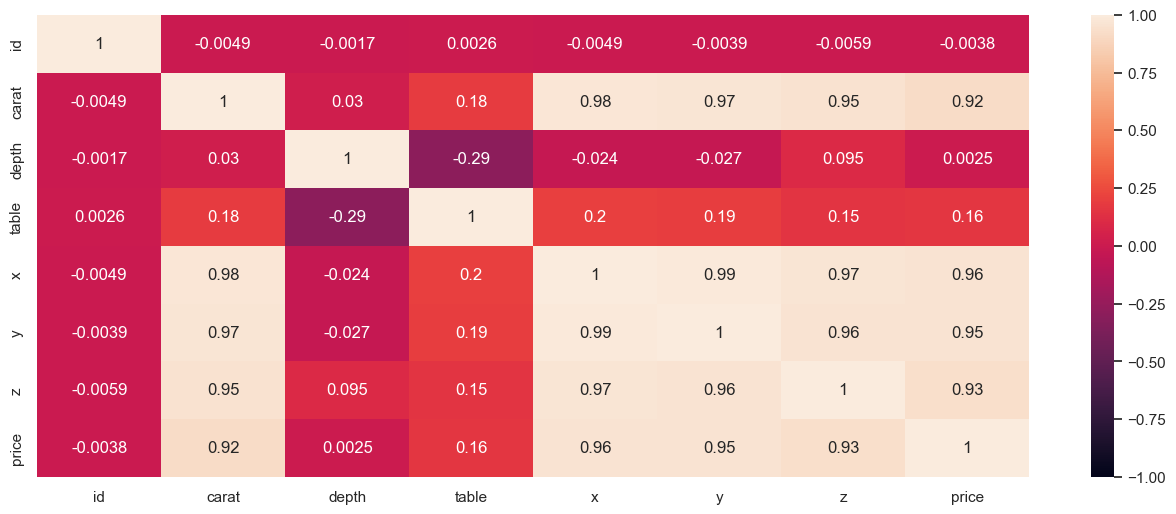

In [16]:
correlation = df_train.corr(numeric_only=True)
plt.figure(figsize=(16, 6))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True);

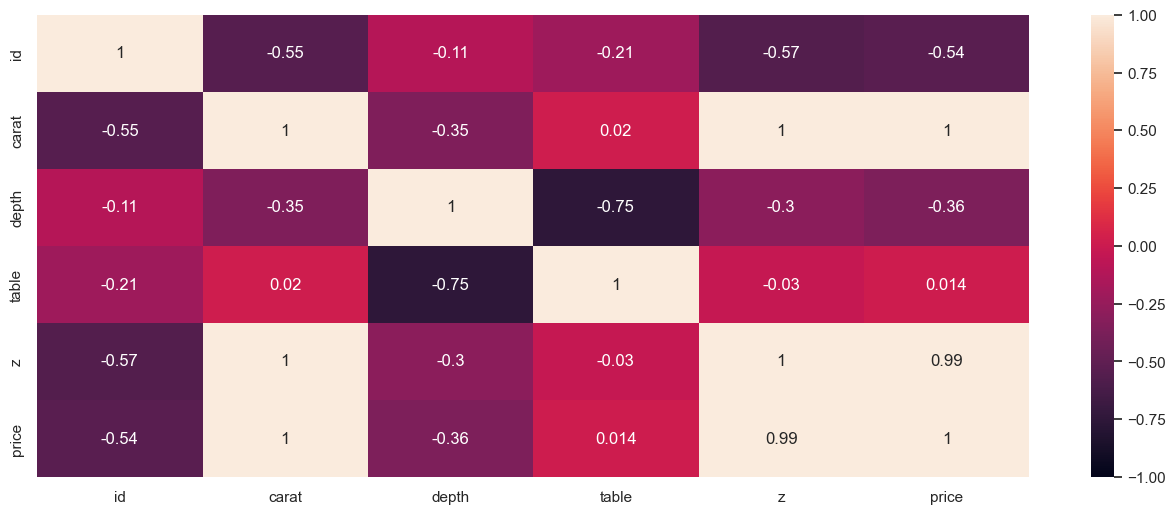

In [29]:
plt.figure(figsize=(16, 6))
sns.heatmap(correlation.drop(columns=["x", "y"]).corr(), vmin=-1, vmax=1, annot=True);

In [30]:
clean_train = df_train.drop(columns=["x", "y"])
clean_train.head(2)

,id,carat,cut,color,clarity,depth,table,z,price
0,0,1.02,Good,D,VS2,63.2,58.0,4.03,8.928
1,1,0.35,Very Good,H,VVS2,61.0,57.0,2.77,6.477


In [31]:
clean_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
z          float64
price      float64
dtype: object

In [32]:
clean_train.clarity.unique()

array(['VS2', 'VVS2', 'VVS1', 'VS1', 'SI1', 'SI2', 'I1', 'IF'],
      dtype=object)

In [33]:
clean_train['clarity'] = clean_train['clarity'].replace({'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1})
clean_train.clarity.value_counts()

clarity
3    9861
4    9196
2    6844
5    6073
6    3848
7    2729
8    1367
1     537
Name: count, dtype: int64

In [8]:
df_train.color.unique()

array(['D', 'H', 'E', 'G', 'F', 'I', 'J'], dtype=object)

In [35]:
clean_train['color'] = clean_train['color'].replace({'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1})
clean_train.color.value_counts()

color
4    8530
6    7352
5    7168
3    6232
7    5102
2    3984
1    2087
Name: count, dtype: int64

In [37]:
clean_train.cut.unique()

array(['Good', 'Very Good', 'Premium', 'Ideal', 'Fair'], dtype=object)

In [45]:
train_dummy = pd.get_dummies(clean_train, columns= ["cut"], drop_first=True, dtype=int)

In [53]:
train_dummy.dtypes

id                 int64
carat            float64
color              int64
clarity            int64
depth            float64
table            float64
z                float64
price            float64
cut_Good           int64
cut_Ideal          int64
cut_Premium        int64
cut_Very Good      int64
dtype: object

# 3. We clean df_test (we clean it exactly like train_df):

In [4]:
df_test.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z
10101,10101,0.33,Ideal,F,VS2,62.1,55.0,4.45,4.47,2.77


In [6]:
df_test.shape

(13485, 10)

In [7]:
#SUBMISSION -> test

In [10]:
print(df_test.shape[0])
df_test.sample()

13485


,id,carat,cut,color,clarity,depth,table,x,y,z
6902,6902,1.5,Premium,G,VS1,60.2,58.0,7.41,7.38,4.45


In [56]:
clean_test = df_test.drop(columns=["x", "y"])
clean_test.head(2)

,id,carat,cut,color,clarity,depth,table,z
0,0,0.81,Ideal,F,SI1,61.5,57.0,3.71
1,1,0.50,Fair,F,I1,63.8,58.0,3.21


In [57]:
clean_test['clarity'] = clean_test['clarity'].replace({'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1})
clean_test.clarity.value_counts()

clarity
3    3204
4    3062
2    2350
5    2098
6    1218
7     926
8     423
1     204
Name: count, dtype: int64

In [58]:
clean_test['color'] = clean_test['color'].replace({'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1})
clean_test.color.value_counts()

color
4    2762
6    2445
5    2374
3    2072
7    1673
2    1438
1     721
Name: count, dtype: int64

In [59]:
test_dummy = pd.get_dummies(clean_test, columns= ["cut"], drop_first=True, dtype=int)

In [60]:
test_dummy.head(4)

,id,carat,color,clarity,depth,table,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0,0.81,5,3,61.5,57.0,3.71,0,1,0,0
1,1,0.50,5,1,63.8,58.0,3.21,0,0,0,0
2,2,0.31,7,6,60.1,56.0,2.67,0,1,0,0
3,3,1.52,2,2,64.7,58.0,4.66,0,0,0,0


In [61]:
test_dummy.dtypes

id                 int64
carat            float64
color              int64
clarity            int64
depth            float64
table            float64
z                float64
cut_Good           int64
cut_Ideal          int64
cut_Premium        int64
cut_Very Good      int64
dtype: object

# 4. Train on df_train:

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg)

In [69]:
!brew install libomp

Running `brew update --auto-update`...
==> Homebrew collects anonymous analytics.
Read the analytics documentation (and how to opt-out) here:
  https://docs.brew.sh/Analytics
No analytics have been recorded yet (nor will be during this `brew` run).

==> Homebrew is run entirely by unpaid volunteers. Please consider donating:
  https://github.com/Homebrew/brew#donations

==> Auto-updated Homebrew!
Updated 4 taps (homebrew/services, mongodb/brew, homebrew/core and homebrew/cask).
==> New Formulae
action-validator                         python-filelock
ain                                      python-hatch-fancy-pypi-readme
ali                                      python-hatch-vcs
amass                                    python-hatchling
ansible@8                                python-idna
apkleaks                                 python-jinja
appstream                                python-jmespath
asitop                                   python-kiwisolver
authz0                         

In [85]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

## I. LinearRegression + o -

In [63]:
X = train_dummy.drop(columns='price')
y = train_dummy['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model1 = LinearRegression().fit(X_train, y_train)

y_pred = model1.predict(X_test)
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"r2: {metrics.r2_score(y_test, y_pred)}")

RMSE, error: 0.5667080914049941
r2: 0.6893596243746645


## II. RidgeRegression + o -

In [72]:
model2 = Ridge().fit(X_train, y_train)

y_pred_2 = model2.predict(X_test)
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_2))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_2)}")

RMSE, error: 0.5661055796840809
r2: 0.6900198054292292


## III. LassoRegression

In [73]:
model3 = Lasso().fit(X_train, y_train)

y_pred_3 = model3.predict(X_test)
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_3))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_3)}")

RMSE, error: 1.0168777615244564
r2: -0.00017633615003664893


## IV. ElasticNet Regression

In [74]:
model4 = ElasticNet().fit(X_train, y_train)

y_pred_4 = model4.predict(X_test)
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_4))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_4)}")

RMSE, error: 0.9056091177781258
r2: 0.20673069759516305


## V. Decision Tree Regression *

In [75]:
model5 = DecisionTreeRegressor().fit(X_train, y_train)

y_pred_5 = model5.predict(X_test)
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_5))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_5)}")

RMSE, error: 0.1425892405095285
r2: 0.9803341561146209


## VI. Random Forest Regression ***

In [76]:
model6 = RandomForestRegressor().fit(X_train, y_train)

y_pred_6 = model6.predict(X_test)
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_6))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_6)}")

RMSE, error: 0.10371439617888024
r2: 0.9895955970829815


## VII. Gradient Boosting Regression **

In [77]:
model7 = GradientBoostingRegressor().fit(X_train, y_train)

y_pred_7 = model7.predict(X_test)
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_7))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_7)}")

RMSE, error: 0.10764228640606562
r2: 0.9887925991978893


## VIII. Support Vector Regression (SVR)

In [78]:
model8 = SVR().fit(X_train, y_train)

y_pred_8 = model8.predict(X_test)
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_8))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_8)}")

RMSE, error: 1.0168196572470547
r2: -6.203949579486334e-05


## IX. K-Nearest Neighbors Regression

In [79]:
model9 = KNeighborsRegressor().fit(X_train, y_train)

y_pred_9 = model9.predict(X_test)
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_9))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_9)}")

RMSE, error: 1.053448923755824
r2: -0.07341100431773961


## X. XGBoost Regression ****

In [83]:
model10 = XGBRegressor().fit(X_train, y_train)

y_pred_10 = model10.predict(X_test)
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_10))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_10)}")

RMSE, error: 0.09788373196118831
r2: 0.9907325529380919


## XI. LightGBM Regression *****

In [86]:
model11 = LGBMRegressor().fit(X_train, y_train)

y_pred_11 = model11.predict(X_test)
print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_11))}")
print(f"r2: {metrics.r2_score(y_test, y_pred_11)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 32364, number of used features: 11
[LightGBM] [Info] Start training from score 7.787415
RMSE, error: 0.09726555092411522
r2: 0.9908492397338492


# Predict on the `test.csv`

## I. LinearRegression + o -

In [91]:
y_pred_1 = model1.predict(test_dummy)

In [92]:
y_pred_2 = model2.predict(test_dummy)

In [93]:
y_pred_5 = model5.predict(test_dummy) # fifth position

In [94]:
y_pred6 = model6.predict(test_dummy) # third position

In [95]:
y_pred_7 = model7.predict(test_dummy) # fourth position

In [96]:
y_pred_10 = model10.predict(test_dummy) # second position

In [97]:
y_pred_11 = model11.predict(test_dummy) # according to the previous code, this is the best model (but may be overfitting).

In [90]:
print(test_dummy.shape[0])
test_dummy.sample()

13485


,id,carat,color,clarity,depth,table,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
13079,13079,0.45,2,4,61.9,54.0,3.05,0,1,0,0


# DF with two columns

In [98]:
# I'm going to choose the third best model, to avoid the risk of getting an overfitted model: 
# model 6 (RandomForestRegressor)

test_dummy['price'] = y_pred6 # Adding the predicted price
for_submission = test_dummy[["id", "price"]] # Modifying for subnmission

In [106]:
# Now I'll choose the second best model

test_dummy['price'] = y_pred_10 # Adding the predicted price
for_submission_2 = test_dummy[["id", "price"]] # Modifying for subnmission

In [110]:
# Now I'll chose the fourth best model:

test_dummy['price'] = y_pred_7 # Adding the predicted price
for_submission_3 = test_dummy[["id", "price"]] # Modifying for subnmission

In [114]:
# I'll choose now the second model (Ridge):

test_dummy['price'] = y_pred_2 # Adding the predicted price
for_submission_4 = test_dummy[["id", "price"]] # Modifying for subnmission

In [118]:
# And finally the first model:

test_dummy['price'] = y_pred_1 # Adding the predicted price
for_submission_5 = test_dummy[["id", "price"]] # Modifying for subnmission

In [120]:
test_dummy['price'] = y_pred_11 # Adding the predicted price
for_submission_6 = test_dummy[["id", "price"]] # Modifying for subnmission

In [115]:
print(for_submission_4.shape)
for_submission_4.sample()

(13485, 2)


,id,price
2394,2394,6.384319


In [116]:
for_submission_4.head(10)

,id,price
0,0,8.030979
1,1,6.741297
2,2,6.950128
3,3,8.804726
4,4,7.165311
5,5,6.641143
6,6,8.170869
7,7,7.156953
8,8,8.077944
9,9,9.781638


# Export (index=False)

In [103]:
for_submission.to_csv("my_submission_2.csv", index=False)

# Just for feedback
if platform == "darwin":
    os.system("say redi for submission")

In [109]:
for_submission_2.to_csv("my_submission_3.csv", index=False)

# Just for feedback
if platform == "darwin":
    os.system("say redi for submission")

In [113]:
for_submission_3.to_csv("my_submission_4.csv", index=False)

# Just for feedback
if platform == "darwin":
    os.system("say redi for submission")

In [117]:
for_submission_4.to_csv("my_submission_5.csv", index=False)

# Just for feedback
if platform == "darwin":
    os.system("say redi for submission")

In [119]:
for_submission_5.to_csv("my_submission_6.csv", index=False)

# Just for feedback
if platform == "darwin":
    os.system("say redi for submission")

In [121]:
for_submission_6.to_csv("my_submission_7.csv", index=False)

# Just for feedback
if platform == "darwin":
    os.system("say redi for submission")